Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
with open('/content/content.json') as content:
  data1 = json.load(content)

In [3]:
data1

{'intents': [{'tag': 'greeting',
   'input': ['hello',
    'hi there',
    'nice to meet you',
    'hi',
    'hey there',
    'hey',
    'hi there',
    'hi, nice to meet you',
    'hello there',
    'anyone there ?',
    'knock knock'],
   'responses': ['Hey yo, do you need help ?',
    'welcome aboard, how may I help you ?',
    'ahoy!!',
    "Hi stranger, what do'ya want ?",
    'Hello my friend, How can I help you ?',
    'Ha , Glad you showed up.. How are you ?']},
  {'tag': 'goodbye',
   'input': ['Thank you',
    'Thanks',
    'Thanks for the info',
    'bye',
    'byr bro',
    'adios',
    'okay bye',
    'goodbye',
    'see you later',
    'i will catch you later',
    'i will catch up later',
    'okay i will see you later',
    'I will talk to you later',
    'will text you later',
    "bye bro, I'll talk to you later",
    'Bye brother'],
   'responses': ['Okay, Bye',
    'Have a nice day',
    'Adios',
    'Goodbye',
    'see you later',
    'nice conversation. bye',
    

In [4]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [5]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [6]:
#printing the data
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,hi,greeting
4,hey there,greeting
5,hey,greeting
6,hi there,greeting
7,"hi, nice to meet you",greeting
8,hello there,greeting
9,anyone there ?,greeting


In [7]:
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,hi,greeting
4,hey there,greeting
5,hey,greeting
6,hi there,greeting
7,hi nice to meet you,greeting
8,hello there,greeting
9,anyone there,greeting


In [8]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [9]:
x_train

array([[ 0,  0,  0,  0,  0,  0, 20],
       [ 0,  0,  0,  0,  0, 10,  6],
       [ 0,  0,  0, 21, 11, 22,  1],
       [ 0,  0,  0,  0,  0,  0, 10],
       [ 0,  0,  0,  0,  0, 23,  6],
       [ 0,  0,  0,  0,  0,  0, 23],
       [ 0,  0,  0,  0,  0, 10,  6],
       [ 0,  0, 10, 21, 11, 22,  1],
       [ 0,  0,  0,  0,  0, 20,  6],
       [ 0,  0,  0,  0,  0, 40,  6],
       [ 0,  0,  0,  0,  0, 24, 24],
       [ 0,  0,  0,  0,  0, 41,  1],
       [ 0,  0,  0,  0,  0,  0, 25],
       [ 0,  0,  0, 25, 42, 43, 44],
       [ 0,  0,  0,  0,  0,  0, 12],
       [ 0,  0,  0,  0,  0, 45, 26],
       [ 0,  0,  0,  0,  0,  0, 46],
       [ 0,  0,  0,  0,  0, 13, 12],
       [ 0,  0,  0,  0,  0,  0, 47],
       [ 0,  0,  0,  0, 27,  1,  4],
       [ 0,  0,  3,  8, 28,  1,  4],
       [ 0,  0,  3,  8, 28, 48,  4],
       [ 0, 13,  3,  8, 27,  1,  4],
       [ 0,  3,  8, 29, 11,  1,  4],
       [ 0,  0,  0,  8, 49,  1,  4],
       [12, 26, 50, 29, 11,  1,  4],
       [ 0,  0,  0,  0,  0, 12, 51],
 

Tensorflow's tokenizer assigns a unique token to each distinct word. and padding is done to get all the data to the same length so as to send it to an rnn layer

In [10]:
input_shape = x_train.shape[1]
print(input_shape)

7


In [11]:
data.shape

(54, 2)

In [12]:
x_train.shape

(54, 7)

In [13]:
x_train[0]

array([ 0,  0,  0,  0,  0,  0, 20], dtype=int32)

In [14]:
x_train[2]

array([ 0,  0,  0, 21, 11, 22,  1], dtype=int32)

In [15]:
tokenizer.word_index

{'you': 1,
 'are': 2,
 'i': 3,
 'later': 4,
 'where': 5,
 'there': 6,
 'do': 7,
 'will': 8,
 'how': 9,
 'hi': 10,
 'to': 11,
 'bye': 12,
 'okay': 13,
 'everything': 14,
 'from': 15,
 'live': 16,
 'going': 17,
 'on': 18,
 'what': 19,
 'hello': 20,
 'nice': 21,
 'meet': 22,
 'hey': 23,
 'knock': 24,
 'thanks': 25,
 'bro': 26,
 'see': 27,
 'catch': 28,
 'talk': 29,
 'fine': 30,
 'hows': 31,
 'is': 32,
 'your': 33,
 'name': 34,
 'a': 35,
 'call': 36,
 'which': 37,
 'in': 38,
 'currently': 39,
 'anyone': 40,
 'thank': 41,
 'for': 42,
 'the': 43,
 'info': 44,
 'byr': 45,
 'adios': 46,
 'goodbye': 47,
 'up': 48,
 'text': 49,
 'ill': 50,
 'brother': 51,
 'am': 52,
 'things': 53,
 'who': 54,
 'chatbot': 55,
 'can': 56,
 'bot': 57,
 'address': 58,
 'country': 59,
 'place': 60,
 'at': 61}

In [16]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  61
output length:  5


In [17]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [19]:
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
2/2 [==============================] - 6s 12ms/step - loss: 1.6080 - accuracy: 0.2778
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 1.6053 - accuracy: 0.2963
Epoch 3/200
2/2 [==============================] - 0s 9ms/step - loss: 1.6028 - accuracy: 0.3148
Epoch 4/200
2/2 [==============================] - 0s 9ms/step - loss: 1.6004 - accuracy: 0.2963
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 1.5976 - accuracy: 0.2963
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 1.5947 - accuracy: 0.2963
Epoch 7/200
2/2 [==============================] - 0s 10ms/step - loss: 1.5924 - accuracy: 0.2963
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 1.5893 - accuracy: 0.2963
Epoch 9/200
2/2 [==============================] - 0s 8ms/step - loss: 1.5862 - accuracy: 0.2963
Epoch 10/200
2/2 [==============================] - 0s 12ms/step - loss: 1.5833 - accuracy: 0.2963
Epoch 11/200
2/2 [========

<h2> Model Analysis </h2>

The model got a perfect accuracy of 100%. 

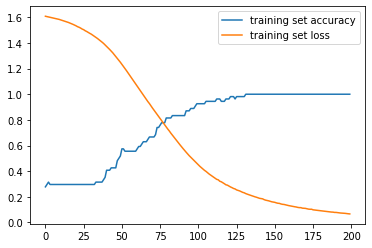

In [20]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [21]:
import random

while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("micky : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You : hi
1/1 [==============================] - 0s 345ms/step
micky :  welcome aboard, how may I help you ?
You : fine.. how are you
1/1 [==============================] - 0s 15ms/step
micky :  I am Great.. thank you
You : where are you
1/1 [==============================] - 0s 15ms/step
micky :  I live in East Blue. Pretty sure you wouldn't have heard about that
You : ok.. see you
1/1 [==============================] - 0s 16ms/step
micky :  Have a nice day


In [22]:
random.choice(responses['goodbye'])

'okay. Have a nice day'

In [23]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(model, 'saved_model.pkl') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['saved_model.pkl']